In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import yfinance as yf
import numpy as np
from sklearn.metrics import mean_absolute_error


data = yf.download(tickers="GOOG", interval="1h", period="730d")[['Open', 'High', 'Low', 'Close']]
data['ds'] = data.index
data.rename(columns={'Open':'y'}, inplace=True)

# df = pd.DataFrame([], columns=['y', 'ds'])
# df['y'] = data['Close']
# df['ds'] = data.index
# df.dropna()

# df.head()

[*********************100%***********************]  1 of 1 completed


C:\Users\anish\AppData\Local\Temp\ipykernel_17136\3306357874.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ds'] = data.index
C:\Users\anish\AppData\Local\Temp\ipykernel_17136\3306357874.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Open':'y'}, inplace=True)


In [22]:
train = data[:-200]
test = data[-200:]
train.tail()

,y,High,Low,Close,ds
Datetime,,,,,
2023-09-13 10:30:00,136.130005,136.460007,135.970001,136.410004,2023-09-13 10:30:00
2023-09-13 11:30:00,136.410004,136.880005,135.809998,136.854996,2023-09-13 11:30:00
2023-09-13 12:30:00,136.854996,137.309998,136.570007,136.899994,2023-09-13 12:30:00
2023-09-13 13:30:00,136.899994,137.500000,136.845001,137.219894,2023-09-13 13:30:00
2023-09-13 14:30:00,137.214996,137.279999,136.744995,137.259995,2023-09-13 14:30:00


In [23]:
# Create a Prophet object and fit it to the data
demo = Prophet(daily_seasonality=True)
demo.add_regressor('High', standardize=False)
demo.add_regressor('Low', standardize=False)
demo.add_regressor('Close', standardize=False)
demo.fit(train)

12:27:05 - cmdstanpy - INFO - Chain [1] start processing
12:27:19 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
# Make predictions for the future dates
# future = demo.make_future_dataframe(periods=100)
forecast = demo.predict(test[['ds', 'High', 'Low', 'Close']])

test_pred = forecast.set_index(forecast['ds'])

test_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Close,Close_lower,Close_upper,High,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2023-10-23 14:30:00,2023-10-23 14:30:00,33.019799,137.540104,138.921220,32.953479,33.094810,-85.138765,-85.138765,-85.138765,115.977219,...,-0.583485,-0.583485,-0.583485,0.106668,0.106668,0.106668,0.0,0.0,0.0,138.245332
2023-10-23 15:30:00,2023-10-23 15:30:00,33.019656,137.237448,138.546828,32.952779,33.095746,-84.763758,-84.763758,-84.763758,115.626559,...,-0.605331,-0.605331,-0.605331,0.106890,0.106890,0.106890,0.0,0.0,0.0,137.881733
2023-10-24 09:30:00,2023-10-24 09:30:00,33.017083,138.084358,139.478603,32.949626,33.094213,-86.239190,-86.239190,-86.239190,117.237927,...,-0.512597,-0.512597,-0.512597,0.110608,0.110608,0.110608,0.0,0.0,0.0,138.766507
2023-10-24 10:30:00,2023-10-24 10:30:00,33.016940,139.374353,140.781318,32.948902,33.095110,-86.322180,-86.322180,-86.322180,117.479969,...,-0.500597,-0.500597,-0.500597,0.110798,0.110798,0.110798,0.0,0.0,0.0,140.040392
2023-10-24 11:30:00,2023-10-24 11:30:00,33.016797,139.335443,140.694367,32.948179,33.095980,-86.014797,-86.014797,-86.014797,117.279675,...,-0.489631,-0.489631,-0.489631,0.110987,0.110987,0.110987,0.0,0.0,0.0,140.052332


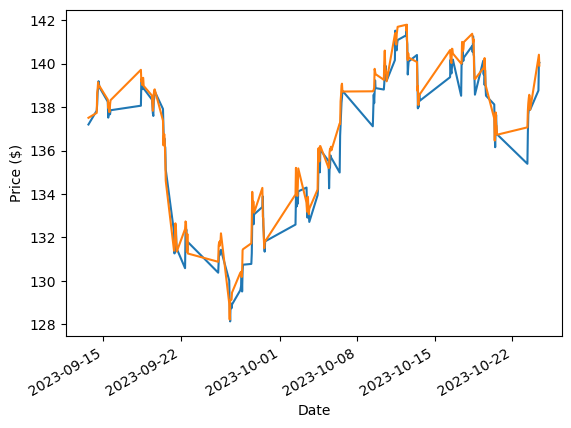

In [27]:
# Visualize the predictions
# demo.plot(forecast[-100:])
test_pred['yhat'].plot()
test['Close'].plot()

plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show()

In [29]:
print("RMSE of Prophet is: ", np.sqrt(np.mean(np.array(test_pred['yhat']-test['y'])**2)))
print("MAE of Prophet is: ", mean_absolute_error(test['y'], test_pred['yhat']))

RMSE of Prophet is:  0.4705550039972834
MAE of Prophet is:  0.38516660676510384
